# Name: Prasad Jawale
Class: D16AD         Roll: 20

AAI Lab 2 - Bayesian Network

# Creating Model

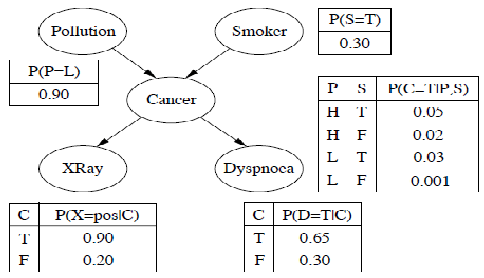

In [ ]:
from pgmpy.models import BayesianNetwork

cancer_model = BayesianNetwork(
    [
        ("Pollution", "Cancer"),
        ("Smoker", "Cancer"),
        ("Cancer", "Xray"),
        ("Cancer", "Dyspnoea"),
    ]
)

In [ ]:
from pgmpy.factors.discrete import TabularCPD

cpd_poll = TabularCPD(variable="Pollution", variable_card=2, values=[[0.9], [0.1]])
cpd_smoke = TabularCPD(variable="Smoker", variable_card=2, values=[[0.3], [0.7]])
cpd_cancer = TabularCPD(
    variable="Cancer",
    variable_card=2,
    values=[[0.03, 0.05, 0.001, 0.02], [0.97, 0.95, 0.999, 0.98]],
    evidence=["Smoker", "Pollution"],
    evidence_card=[2, 2],
)
cpd_xray = TabularCPD(
    variable="Xray",
    variable_card=2,
    values=[[0.9, 0.2], [0.1, 0.8]],
    evidence=["Cancer"],
    evidence_card=[2],
)
cpd_dysp = TabularCPD(
    variable="Dyspnoea",
    variable_card=2,
    values=[[0.65, 0.3], [0.35, 0.7]],
    evidence=["Cancer"],
    evidence_card=[2],
)

In [ ]:
# Associating the parameters with the model structure.
cancer_model.add_cpds(cpd_poll, cpd_smoke, cpd_cancer, cpd_xray, cpd_dysp)
cancer_model.check_model()

True

Nodes of Bayesian Network

In [ ]:
cancer_model.nodes()

NodeView(('Pollution', 'Cancer', 'Smoker', 'Xray', 'Dyspnoea'))

Edges of Bayesian Network

In [ ]:
cancer_model.edges()

OutEdgeView([('Pollution', 'Cancer'), ('Cancer', 'Xray'), ('Cancer', 'Dyspnoea'), ('Smoker', 'Cancer')])

In [ ]:
cancer_model.active_trail_nodes("Pollution")

{'Pollution': {'Cancer', 'Dyspnoea', 'Pollution', 'Xray'}}

In [ ]:
cancer_model.local_independencies("Xray")

(Xray ⟂ Dyspnoea, Smoker, Pollution | Cancer)

In [ ]:
cancer_model.get_independencies()

(Smoker ⟂ Pollution)
(Smoker ⟂ Xray, Dyspnoea | Cancer)
(Smoker ⟂ Xray | Dyspnoea, Cancer)
(Smoker ⟂ Dyspnoea | Xray, Cancer)
(Smoker ⟂ Xray, Dyspnoea | Cancer, Pollution)
(Smoker ⟂ Xray | Pollution, Dyspnoea, Cancer)
(Smoker ⟂ Dyspnoea | Xray, Cancer, Pollution)
(Dyspnoea ⟂ Xray, Smoker, Pollution | Cancer)
(Dyspnoea ⟂ Xray, Smoker | Cancer, Pollution)
(Dyspnoea ⟂ Smoker, Pollution | Xray, Cancer)
(Dyspnoea ⟂ Xray, Pollution | Smoker, Cancer)
(Dyspnoea ⟂ Smoker | Xray, Cancer, Pollution)
(Dyspnoea ⟂ Xray | Cancer, Smoker, Pollution)
(Dyspnoea ⟂ Pollution | Xray, Smoker, Cancer)
(Xray ⟂ Dyspnoea, Smoker, Pollution | Cancer)
(Xray ⟂ Smoker, Pollution | Dyspnoea, Cancer)
(Xray ⟂ Dyspnoea, Smoker | Cancer, Pollution)
(Xray ⟂ Dyspnoea, Pollution | Smoker, Cancer)
(Xray ⟂ Smoker | Cancer, Dyspnoea, Pollution)
(Xray ⟂ Pollution | Smoker, Dyspnoea, Cancer)
(Xray ⟂ Dyspnoea | Cancer, Smoker, Pollution)
(Pollution ⟂ Smoker)
(Pollution ⟂ Xray, Dyspnoea | Cancer)
(Pollution ⟂ Xray | Dyspnoea, Can

#Model Testing

In [ ]:
from pgmpy.inference import VariableElimination
inference = VariableElimination(cancer_model)

1. Probablility of being a smoker given pollution

In [ ]:
query = inference.query(variables=["Smoker"], evidence={"Pollution": 1})
print(query)

+-----------+---------------+
| Smoker    |   phi(Smoker) |
+===========+===============+
| Smoker(0) |        0.3000 |
+-----------+---------------+
| Smoker(1) |        0.7000 |
+-----------+---------------+


2. Probability of having cancer given polllution and smoking

In [ ]:
query = inference.query(variables=["Cancer"], evidence={"Pollution": 1, "Smoker": 1})
print(query)

+-----------+---------------+
| Cancer    |   phi(Cancer) |
+===========+===============+
| Cancer(0) |        0.0200 |
+-----------+---------------+
| Cancer(1) |        0.9800 |
+-----------+---------------+


3. Probability of Xray given cancer

In [ ]:
query = inference.query(variables=["Xray"], evidence={"Cancer": 1})
print(query)

+---------+-------------+
| Xray    |   phi(Xray) |
+=========+=============+
| Xray(0) |      0.2000 |
+---------+-------------+
| Xray(1) |      0.8000 |
+---------+-------------+
